## Wind数据集练习

In [17]:
# 1.导入 Wind 数据，并展示表头
import pandas as pd
import time
import datetime
import dateutil
df = pd.read_table("wind.data",sep='\s+',parse_dates=[[0,1,2]])
df.head()

,Yr_Mo_Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,2061-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,2061-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,2061-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,2061-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,2061-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83


In [9]:
# 2.设法解决违规日期（2061 年）的问题，将其改为 1961 年
df["Yr_Mo_Dy"]=df["Yr_Mo_Dy"].apply(lambda x : x - dateutil.relativedelta.relativedelta(years=100))
def fix_century(x):
   year = x.year - 100 if x.year > 1989 else x.year
   return datetime.date(year, x.month, x.day)
df['Yr_Mo_Dy'] = df['Yr_Mo_Dy'].apply(fix_century)
df.head()

,Yr_Mo_Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,1961-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,1961-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,1961-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,1961-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83


In [21]:
# 3.将日期设为datetime64索引df["Yr_Mo_Dy"] = pd.to_datetime (df["Yr_Mo_Dy"])
df = df.set_index('Yr_Mo_Dy')
df.head( )

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL,date
Yr_Mo_Dy,,,,,,,,,,,,,
2061-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04,0
2061-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83,1
2061-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71,2
2061-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88,3
2061-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83,4


In [22]:
# 4. 统计缺失值个数
df.isnull().sum()

RPT     6
VAL     3
ROS     2
KIL     5
SHA     2
BIR     0
DUB     3
CLA     2
MUL     3
CLO     1
BEL     0
MAL     4
date    0
dtype: int64

In [11]:
# 5.计算每个地区的风速平均值
df.mean().mean()

C:\Users\dell\AppData\Local\Temp/ipykernel_7764/247194472.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.mean().mean()


10.227982360836924

In [12]:
# 6.创建一个名为loc_stats的数据框去计算并存储每个location 的风速最小值，最大值，平均值和标准差
loc_stats = pd.DataFrame
loc_stats = df.aggregate(["min","max","mean","std"])
loc_stats['min']= df.min()
loc_stats['max']= df.max()
loc_stats['mean']=df.mean()
loc_stats['std']=df.std()
loc_stats


C:\Users\dell\AppData\Local\Temp/ipykernel_7764/2381612198.py:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  loc_stats['mean']=df.mean()
C:\Users\dell\AppData\Local\Temp/ipykernel_7764/2381612198.py:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  loc_stats['std']=df.std()


,Yr_Mo_Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL,min,max,mean,std
min,1873-01-01,0.670000,0.210000,1.500000,0.000000,0.130000,0.000000,0.000000,0.000000,0.000000,0.040000,0.130000,0.670000,NaN,NaN,NaN,NaN
max,1972-12-31,35.800000,33.370000,33.840000,28.460000,37.540000,26.160000,30.370000,31.080000,25.880000,28.210000,42.380000,42.540000,NaN,NaN,NaN,NaN
mean,NaN,12.362987,10.644314,11.660526,6.306468,10.455834,7.092254,9.797343,8.495053,8.493590,8.707332,13.121007,15.599079,NaN,NaN,NaN,NaN
std,NaN,5.618413,5.267356,5.008450,3.605811,4.936125,3.968683,4.977555,4.499449,4.166872,4.503954,5.835037,6.699794,NaN,NaN,NaN,NaN


In [24]:
# 7.创建一个名为 day_stats 的数据框去计算并存储每天的风速最小值，最大值，平均值和标准差
day_stats = pd.DataFrame( )
day_stats['min'] = df.min(axis = 1)
day_stats['max'] = df.max(axis = 1)
day_stats['mean'] = df.mean(axis = 1)
day_stats['std'] = df.std (axis = 1)
day_stats.head( )

,min,max,mean,std
Yr_Mo_Dy,,,,
2061-01-01,0.00,18.50,11.933333,4.614681
2061-01-02,1.00,17.54,10.475000,4.260110
2061-01-03,2.00,18.50,10.838333,4.480081
2061-01-04,1.79,11.75,6.340769,3.222304
2061-01-05,4.00,13.33,10.120000,2.977037


In [25]:
# 7.创建一个名为 day_stats 的数据框去计算并存储每天的风速最小值，最大值，平均值和标准差
day_stats = pd.DataFrame( )
day_stats['min'] = df.min(axis = 1)
day_stats['max'] = df.max(axis = 1)
day_stats['mean'] = df.mean(axis = 1)
day_stats['std'] = df.std (axis = 1)
day_stats.head( )

,min,max,mean,std
Yr_Mo_Dy,,,,
2061-01-01,0.00,18.50,11.933333,4.614681
2061-01-02,1.00,17.54,10.475000,4.260110
2061-01-03,2.00,18.50,10.838333,4.480081
2061-01-04,1.79,11.75,6.340769,3.222304
2061-01-05,4.00,13.33,10.120000,2.977037


In [26]:
# 8.对于每一个 location，计算一月份的平均风速
df['date'] = df.index
df['month'] = df['date'].apply(lambda date: date.month)
df['year'] = df['date'].apply(lambda date: date.year)
df['day'] = df['date'].apply(lambda date: date.day)
january_winds = df.query('month ==1')
january_winds.loc[:, 'RPT' : "MAL"].mean( )

RPT    14.847325
VAL    12.914560
ROS    13.299624
KIL     7.199498
SHA    11.667734
BIR     8.054839
DUB    11.819355
CLA     9.512047
MUL     9.543208
CLO    10.053566
BEL    14.550520
MAL    18.028763
dtype: float64

In [27]:
# 9.对于数据，分别以年、月为频率取样
df.query('month == 1 and day ==1')
df.query('day ==1')

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL,date,month,year,day
Yr_Mo_Dy,,,,,,,,,,,,,,,,
2061-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04,2061-01-01,1,2061,1
2061-02-01,14.25,15.12,9.04,5.88,12.08,7.17,10.17,3.63,6.50,5.50,9.17,8.00,2061-02-01,2,2061,1
2061-03-01,12.67,13.13,11.79,6.42,9.79,8.54,10.25,13.29,NaN,12.21,20.62,NaN,2061-03-01,3,2061,1
2061-04-01,8.38,6.34,8.33,6.75,9.33,9.54,11.67,8.21,11.21,6.46,11.96,7.17,2061-04-01,4,2061,1
2061-05-01,15.87,13.88,15.37,9.79,13.46,10.17,9.96,14.04,9.75,9.92,18.63,11.12,2061-05-01,5,2061,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1978-08-01,19.33,15.09,20.17,8.83,12.62,10.41,9.33,12.33,9.50,9.92,15.75,18.00,1978-08-01,8,1978,1
1978-09-01,8.42,6.13,9.87,5.25,3.21,5.71,7.25,3.50,7.33,6.50,7.62,15.96,1978-09-01,9,1978,1
1978-10-01,9.50,6.83,10.50,3.88,6.13,4.58,4.21,6.50,6.38,6.54,10.63,14.09,1978-10-01,10,1978,1


## Iris数据集练习

In [50]:
# 1.导入Iris数据
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
iris_data = pd.read_csv("iris.csv")

In [62]:
# 2.计算Iris-setosa鸢尾花数据的：平均值、中位数、众数、极差、标准差、方差
平均值 = iris_data["sepal_length"].mean()
print("平均值: ",平均值)
中位数 = iris_data["sepal_length"].median()
print("中位数： ",中位数)
众数 = iris_data["sepal_length"].mode()
print("众数： ",众数)
极差 = np.max(iris_data["sepal_length"])-np.min(iris_data["sepal_length"])
print("极差： ",极差)
标准差 = iris_data["sepal_length"].std()
print("标准差： ",标准差)
方差 = iris_data["sepal_length"].var()
print("方差： ",方差)


平均值:  5.843333333333335
中位数：  5.8
众数：  0    5.0
dtype: float64
极差：  3.6000000000000005
标准差：  0.8280661279778629
方差：  0.6856935123042505


c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


c:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 22343 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 20540 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 20013 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 20301 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 25968 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 20247 missing from c

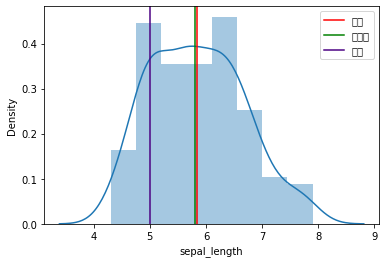

In [64]:
# 3.绘制Iris-virginica的四个数据直方图
sns.distplot(data["sepal_length"])
# 绘制垂直线
plt.axvline(mean, ls = '-', color = 'r', label = "均值")
plt.axvline(median, ls = '-', color = 'g', label = "中位数")
plt.axvline(mode, ls = '-', color = 'indigo', label = "众数")
plt.legend()
